# Question 6

### Question 6 [10 points]

Reproduce one of the images in Figure 3. (Figure reproduced: b)

Make necessary library imports + set plot settings

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

Import xarray dataset

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

Preprocess data and calculate values needed to make the plot

In [13]:
# shrink data to Newport
ds_cels = ds.sel(lat=45, lon=-124.061, method='nearest')

# celsius conversion
ds_cels['sst_celsius'] = ds_cels.analysed_sst - 273.15
ds_cels.coords['day_of_year'] = ds_cels.time.dt.dayofyear

# rolling avg on whole dataset (stops nan from occurring at beginning and end)
ds_roll = ds_cels.sst_celsius.rolling(time=30, center=True).mean()

# filter by year
ds14 = ds_roll.sel(time='2014')
ds15 = ds_roll.sel(time='2015')
ds16 = ds_roll.sel(time='2016')

# rolling mean over 2002-2013
rollings_grouped = ds_roll.sel(time=slice('2002','2013')).groupby('day_of_year').mean()
rollings_sds = ds_roll.sel(time=slice('2002','2013')).groupby('day_of_year').std()

rollings_sds['sd_lower_bound'] = rollings_grouped - rollings_sds
rollings_sds['sd_upper_bound'] = rollings_grouped + rollings_sds

# maxes and mins from 2002-2013
maxes = beforetime.groupby('day_of_year').max()
mins = beforetime.groupby('day_of_year').min()
extremum = beforetime.groupby('day_of_year').mean()
extremum['maxes'] = maxes
extremum['mins'] = mins

2014, 2015, 2016 SSTs plotted in blue, red, and green.

Mean from 2002-2013 plotted in black.

Light gray represents extrema from 2002-2013

Opaque gray represents +-1 SD from 2002-2013

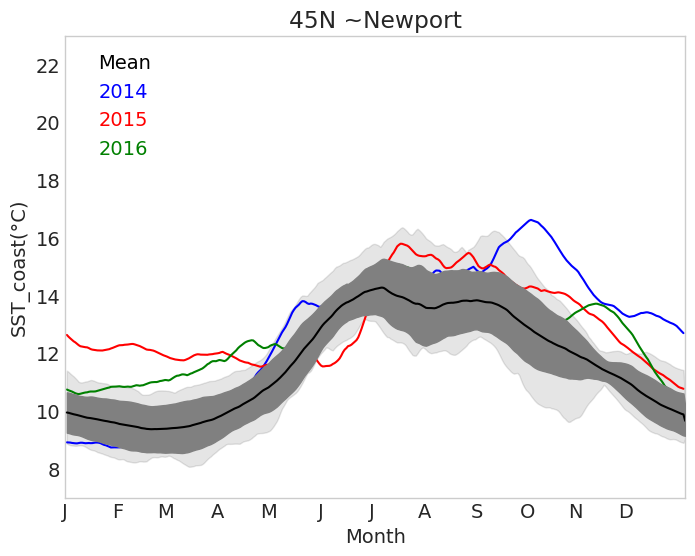

In [16]:
# plot rolling means for 2002-2013
rollings_grouped.plot(x='day_of_year', color='black', label='Mean', zorder=4)

# plot 2014, 2015, 2016
ds14.plot(x='day_of_year', color='blue', label='2014')
ds15.plot(x='day_of_year', color='red', label='2015')
ds16.plot(x='day_of_year', color='green', label='2016')

# create shaded area for maximum/minimum, opaque area for +- 1 SD 
plt.fill_between(rollings_sds.day_of_year, rollings_sds.sd_lower_bound, rollings_sds.sd_upper_bound, zorder=3, color='gray')
plt.fill_between(extremum.day_of_year, extremum.mins, extremum.maxes, alpha=0.1, color='black')

# titling and labeling, legend, gridlines
plt.title('45N ~Newport')
plt.grid(False)
plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 301, 331], 
           ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])  
plt.xlabel('Month')
plt.ylim(7, 23)
plt.xlim(0, 366)
plt.ylabel('SST_coast(°C)')
plt.legend(loc='upper left', labelcolor='linecolor', handlelength=0)

plt.savefig('outputs/q06.png')